In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D4-Allyson/S1/Office_Allyson-S1.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:1440]
test_data = df.iloc[1440:]

In [5]:
len(train_data),len(test_data)

(1440, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (1416, 24, 1)
y_train.shape =  (1416,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24)                2496      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
12/12 [==============================] - 2s 13ms/step - loss: 499.1487
Epoch 2/300
12/12 [==============================] - 0s 11ms/step - loss: 481.8250
Epoch 3/300
12/12 [==============================] - 0s 11ms/step - loss: 466.2354
Epoch 4/300
12/12 [==============================] - 0s 12ms/step - loss: 449.8289
Epoch 5/300
12/12 [==============================] - 0s 12ms/step - loss: 428.2979
Epoch 6/300
12/12 [==============================] - 0s 11ms/step - loss: 401.2778
Epoch 7/300
12/12 [==============================] - 0s 12ms/step - loss: 371.3008
Epoch 8/300
12/12 [==============================] - 0s 11ms/step - loss: 343.6075
Epoch 9/300
12/12 [==============================] - 0s 12ms/step - loss: 317.4711
Epoch 10/300
12/12 [==============================] - 0s 12ms/step - loss: 293.1152
Epoch 11/300
12/12 [==============================] - 0s 11ms/step - loss: 273.9643
Epoch 12/300
12/12 [==============================] - 0s 12ms/step - loss: 259.3688
E

In [ ]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [ ]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [ ]:
print('Root Mean Squared Error for LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for LSTM Model for training is:',mae_train)
print('Mean Absolute Error for LSTM Model for testing is:',mae_test)
print('MAPE for LSTM Model for training is:',mape_train)
print('MAPE for LSTM Model for testing is:',mape_test)

Root Mean Squared Error for LSTM Model for training is: 3.952568282399851
Root Mean Squared Error for LSTM Model for testing is: 2.717858739445821
Mean Absolute Error for LSTM Model for training is: 2.0987650560928603
Mean Absolute Error for LSTM Model for testing is: 1.6294759834771868
MAPE for LSTM Model for training is: 0.09587753028773857
MAPE for LSTM Model for testing is: 0.06914390858197826


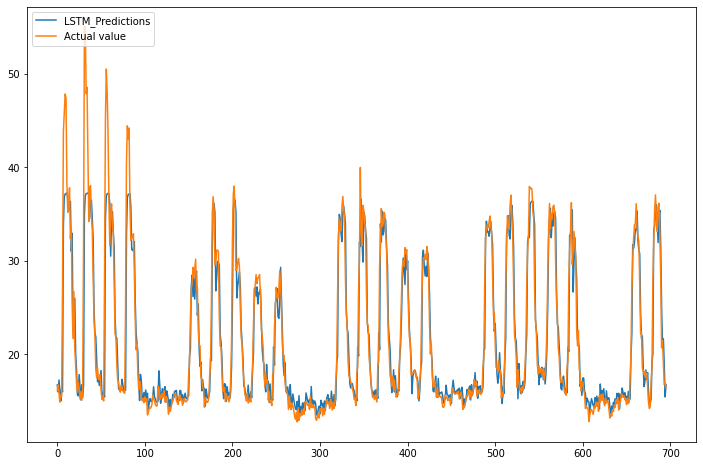

In [ ]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([16.15]), array([16.73375], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.58374939]), array([0.75696014]), array([-1.38758171]), array([-1.05886208]), array([0.66035454]), array([-0.95914886]), array([11.05233482]), array([10.00875214]), array([8.89424896]), array([10.70075974]), array([10.13678131]), array([1.13384186]), array([-1.53941589]), array([1.01936493]), array([1.97097473]), array([-3.98235596]), array([2.65367096]), array([-7.56587326]), array([-1.00635963]), array([4.95250008]), array([-5.43999809]), array([-1.18833694]), array([-1.42310768]), array([0.24977394]), array([1.41242264]), array([-1.50619713]), array([-1.30664948]), array([0.89956787]), array([-1.667658]), array([0.67764763]), array([14.62998116]), array([19.9918454]), array([18.07567169]), array([10.67853271]), array([11.32778625]), array([3.91448822]), array([-2.87414459]), array([3.28099091]), array([1.5773819]), array([-1.69672485]), array([-1.21121521]), array([-4.23404022]), array([-1.14020149]), array([-0.41209709]), array([-3.41624504]), array([-1.91735268]), array(

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([19.9918454]), array([-7.56587326]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(399, 297)